In [1]:
# General imports:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

In [2]:
#Loading the Carmanah Products Tweets
carmanah = pd.read_csv('C:/Users/vumamahe/Twitter-Get-Old-Tweets-Scraper-master/Carmanah_Products_Tweets.csv', low_memory=False)

In [3]:
#Seeing first 5 rows by using head function to understand how data looks like
carmanah.head()

,username,user_handle,date,retweets,favorites,text,geological_location,mentions,hashtags,tweet_id,permalink,Unnamed: 11
0,Raj Patel,Rajio,5/15/2008 11:49,0,0,Lunch&Learn today by Carmanah Technologies (so...,NaN,NaN,NaN,812034535,https://twitter.com/Rajio/status/812034535,NaN
1,Jon-Paul Bussoli,jbussoli,10/10/2008 14:31,0,0,@ rogerkondrat I work for Carmanah Technologie...,NaN,@,NaN,954544141,https://twitter.com/jbussoli/status/954544141,NaN
2,Denis Du Bois,cleantech,1/12/2009 14:50,0,0,Carmanah missed the bus with solar transit she...,NaN,NaN,NaN,1113850709,https://twitter.com/cleantech/status/1113850709,NaN
3,Ryan Speed,unclespeedo,1/18/2009 14:47,0,0,Carmanah Technologies is looking for a Marketi...,NaN,NaN,NaN,1128724286,https://twitter.com/unclespeedo/status/1128724286,NaN
4,AENews,AENews,2/12/2009 13:22,0,0,Carmanah Partners With Shine Micro to Combine ...,NaN,NaN,NaN,1203540007,https://twitter.com/AENews/status/1203540007,NaN


In [4]:
#Knowing the data types of all the columns
carmanah.dtypes

username               object
user_handle            object
date                   object
retweets                int64
favorites               int64
text                   object
geological_location    object
mentions               object
hashtags               object
tweet_id               object
permalink              object
Unnamed: 11            object
dtype: object

In [5]:
# Pulling out and seeing the tweets alone
carmanah.text

0      Lunch&Learn today by Carmanah Technologies (so...
1      @ rogerkondrat I work for Carmanah Technologie...
2      Carmanah missed the bus with solar transit she...
3      Carmanah Technologies is looking for a Marketi...
4      Carmanah Partners With Shine Micro to Combine ...
5      Carmanah Partners With Shine Micro to Combine ...
6              Carmanah Technologies is hiring a Manager
7      Carmanah Introduces Compact Solar-Charging Kit...
8      Carmanah Introduces Solar LED Lighting for Str...
9      [LEDinside] Carmanah’s Solar LED Lighting is D...
10     GREEN PRODUCTS: Carmanah Introduces Solar LED ...
11     looking for anyone with information about Carm...
12     Carmanah Announces Record Operating Performanc...
13     New blog post: Toronto Parking Authority to In...
14     RT Toronto Parking Authority Goes Green with C...
15     Carmanah Technologies posts $1.3-million 2008 ...
16     [full-time] Solar Power Systems Engineer at Ca...
17     Globe and Mail Profile C

In [6]:
# Quantity of metadata contained in a single tweet
print(dir(carmanah.text[0]))

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmod__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'capitalize', 'casefold', 'center', 'count', 'encode', 'endswith', 'expandtabs', 'find', 'format', 'format_map', 'index', 'isalnum', 'isalpha', 'isdecimal', 'isdigit', 'isidentifier', 'islower', 'isnumeric', 'isprintable', 'isspace', 'istitle', 'isupper', 'join', 'ljust', 'lower', 'lstrip', 'maketrans', 'partition', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'split', 'splitlines', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'zfill']


In [7]:
#No of rows and columns
carmanah.shape

(371, 12)

In [8]:
# Printing the first row and analyzing
carmanah.iloc[0]

username                                                       Raj Patel
user_handle                                                        Rajio
date                                                     5/15/2008 11:49
retweets                                                               0
favorites                                                              0
text                   Lunch&Learn today by Carmanah Technologies (so...
geological_location                                                  NaN
mentions                                                             NaN
hashtags                                                             NaN
tweet_id                                                       812034535
permalink                     https://twitter.com/Rajio/status/812034535
Unnamed: 11                                                          NaN
Name: 0, dtype: object

In [9]:
# New column that contains the length of each message (Feature Extraction)
carmanah['len'] = carmanah['text'].apply(len)

In [10]:
# # Display of first 10 elements from dataframe with new column added:
display(carmanah.head(10))

,username,user_handle,date,retweets,favorites,text,geological_location,mentions,hashtags,tweet_id,permalink,Unnamed: 11,len
0,Raj Patel,Rajio,5/15/2008 11:49,0,0,Lunch&Learn today by Carmanah Technologies (so...,NaN,NaN,NaN,812034535,https://twitter.com/Rajio/status/812034535,NaN,125
1,Jon-Paul Bussoli,jbussoli,10/10/2008 14:31,0,0,@ rogerkondrat I work for Carmanah Technologie...,NaN,@,NaN,954544141,https://twitter.com/jbussoli/status/954544141,NaN,65
2,Denis Du Bois,cleantech,1/12/2009 14:50,0,0,Carmanah missed the bus with solar transit she...,NaN,NaN,NaN,1113850709,https://twitter.com/cleantech/status/1113850709,NaN,118
3,Ryan Speed,unclespeedo,1/18/2009 14:47,0,0,Carmanah Technologies is looking for a Marketi...,NaN,NaN,NaN,1128724286,https://twitter.com/unclespeedo/status/1128724286,NaN,87
4,AENews,AENews,2/12/2009 13:22,0,0,Carmanah Partners With Shine Micro to Combine ...,NaN,NaN,NaN,1203540007,https://twitter.com/AENews/status/1203540007,NaN,140
5,AENews,AENews,2/12/2009 13:22,0,0,Carmanah Partners With Shine Micro to Combine ...,NaN,NaN,NaN,1203540007,https://twitter.com/AENews/status/1203540007,NaN,140
6,Ryan Speed,unclespeedo,2/19/2009 14:03,0,0,Carmanah Technologies is hiring a Manager,"Information Systems"" anyone wanna move to Vic...",NaN,NaN,NaN,1227706419,NaN,41
7,Solar,australiansolar,3/4/2009 2:47,0,0,Carmanah Introduces Compact Solar-Charging Kit...,NaN,NaN,NaN,1277702945,https://twitter.com/australiansolar/status/127...,NaN,140
8,Everything Finance,AllFinance,3/4/2009 20:37,0,0,Carmanah Introduces Solar LED Lighting for Str...,NaN,NaN,NaN,1281355917,https://twitter.com/AllFinance/status/1281355917,NaN,87
9,LEDinside,LEDinside,3/5/2009 3:04,0,0,[LEDinside] Carmanah’s Solar LED Lighting is D...,NaN,NaN,NaN,1282514177,https://twitter.com/LEDinside/status/1282514177,NaN,119


In [36]:
# We extract the mean of lenghts:
mean = np.mean(carmanah['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 151.7277628032345


In [12]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(carmanah['favorites'])
rt_max  = np.max(carmanah['retweets'])

fav = carmanah[carmanah.favorites == fav_max].index[0]
rt  = carmanah[carmanah.retweets == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(carmanah['text'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(carmanah['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(carmanah['text'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(carmanah['len'][rt]))

The tweet with more likes is: 
Thank you @ CarmanahTraffic for purchasing patents, disclaiming patent protections and ending this lawsuit. It’s a very positive act of public service to reward inventor of device with some $ while letting this critical safety device be used by everyone across the USA https://twitter.com/carmanahtraffic/status/976191900133752838 …
Number of likes: 25
332 characters.

The tweet with more retweets is: 
Important update: Carmanah purchases and disclaims patents for the rectangular rapid flashing beacon (RRFB), leading the @ USDOTFHWA to reinstate this highly effective and low-cost crosswalk treatment for interim approval in the @ MUTCD. Learn more now: https://buff.ly/2DHLLI1 pic.twitter.com/ut90PvyBEq
Number of retweets: 9
304 characters.



In [13]:
carmanah['date'] = pd.to_datetime(carmanah['date'])

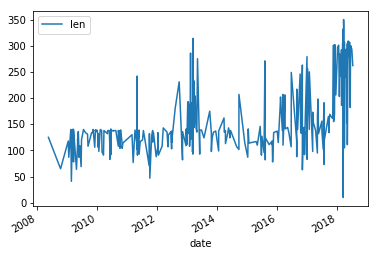

In [66]:
carmanah.plot(x='date', y='len')
plt.savefig('carmanah_lenght.png')

In [ ]:
carmanah.plot(x='date', y='favorites')

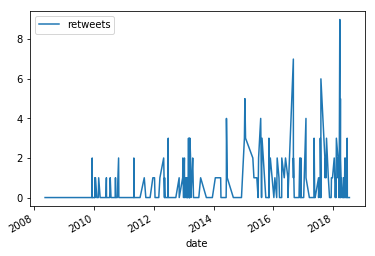

In [16]:
carmanah.plot(x='date', y='retweets')

In [17]:
from textblob import TextBlob
import re

def clean_tweet(text):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())

def analize_sentiment(text):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(text))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [18]:
# We create a column with the result of the analysis:
carmanah['SA'] = np.array([ analize_sentiment(text) for text in carmanah['text'] ])

# We display the updated dataframe with the new column:
display(carmanah.head(10))

,username,user_handle,date,retweets,favorites,text,geological_location,mentions,hashtags,tweet_id,permalink,Unnamed: 11,len,SA
0,Raj Patel,Rajio,2008-05-15 11:49:00,0,0,Lunch&Learn today by Carmanah Technologies (so...,NaN,NaN,NaN,812034535,https://twitter.com/Rajio/status/812034535,NaN,125,-1
1,Jon-Paul Bussoli,jbussoli,2008-10-10 14:31:00,0,0,@ rogerkondrat I work for Carmanah Technologie...,NaN,@,NaN,954544141,https://twitter.com/jbussoli/status/954544141,NaN,65,0
2,Denis Du Bois,cleantech,2009-01-12 14:50:00,0,0,Carmanah missed the bus with solar transit she...,NaN,NaN,NaN,1113850709,https://twitter.com/cleantech/status/1113850709,NaN,118,0
3,Ryan Speed,unclespeedo,2009-01-18 14:47:00,0,0,Carmanah Technologies is looking for a Marketi...,NaN,NaN,NaN,1128724286,https://twitter.com/unclespeedo/status/1128724286,NaN,87,0
4,AENews,AENews,2009-02-12 13:22:00,0,0,Carmanah Partners With Shine Micro to Combine ...,NaN,NaN,NaN,1203540007,https://twitter.com/AENews/status/1203540007,NaN,140,0
5,AENews,AENews,2009-02-12 13:22:00,0,0,Carmanah Partners With Shine Micro to Combine ...,NaN,NaN,NaN,1203540007,https://twitter.com/AENews/status/1203540007,NaN,140,0
6,Ryan Speed,unclespeedo,2009-02-19 14:03:00,0,0,Carmanah Technologies is hiring a Manager,"Information Systems"" anyone wanna move to Vic...",NaN,NaN,NaN,1227706419,NaN,41,0
7,Solar,australiansolar,2009-03-04 02:47:00,0,0,Carmanah Introduces Compact Solar-Charging Kit...,NaN,NaN,NaN,1277702945,https://twitter.com/australiansolar/status/127...,NaN,140,0
8,Everything Finance,AllFinance,2009-03-04 20:37:00,0,0,Carmanah Introduces Solar LED Lighting for Str...,NaN,NaN,NaN,1281355917,https://twitter.com/AllFinance/status/1281355917,NaN,87,0
9,LEDinside,LEDinside,2009-03-05 03:04:00,0,0,[LEDinside] Carmanah’s Solar LED Lighting is D...,NaN,NaN,NaN,1282514177,https://twitter.com/LEDinside/status/1282514177,NaN,119,0


In [19]:
# We construct lists with classified tweets:

pos_tweets = [ text for index, text in enumerate(carmanah['text']) if carmanah['SA'][index] > 0]
neu_tweets = [ text for index, text in enumerate(carmanah['text']) if carmanah['SA'][index] == 0]
neg_tweets = [ text for index, text in enumerate(carmanah['text']) if carmanah['SA'][index] < 0]

In [20]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(carmanah['text'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(carmanah['text'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(carmanah['text'])))

Percentage of positive tweets: 39.62264150943396%
Percentage of neutral tweets: 52.02156334231806%
Percentage of negative tweets: 8.355795148247978%


In [21]:
from wordcloud import WordCloud, STOPWORDS
import re
import matplotlib.pyplot as plt
import nltk

In [22]:
word_string=" ".join(carmanah['text'].str.lower())
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['carmanah','technologies','http','com','www','bit','ly','https','twitter']
stopwords.extend(newStopWords)

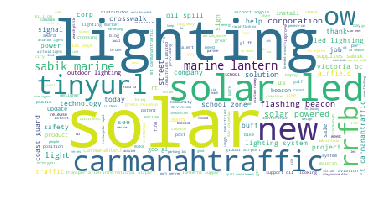

In [23]:
no_url_word_string = re.sub(r"[\w.-]+twitter[\w.-]+", '', word_string)
wordcloud = WordCloud(stopwords=stopwords, background_color='white', max_words=300).generate(no_url_word_string)
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

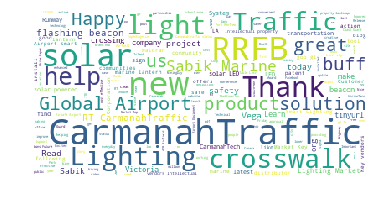

In [24]:
word_string=" ".join(pos_tweets)
no_url_word_string = re.sub(r"[\w.-]+twitter[\w.-]+", '', word_string)
wordcloud = WordCloud(stopwords=stopwords, background_color='white', max_words=300).generate(no_url_word_string)
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

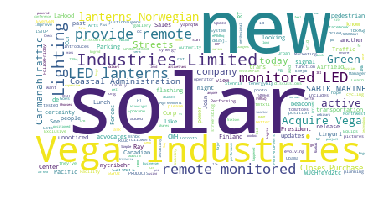

In [25]:
word_string=" ".join(neg_tweets)
no_url_word_string = re.sub(r"[\w.-]+twitter[\w.-]+", '', word_string)
wordcloud = WordCloud(stopwords=stopwords, background_color='white', max_words=300).generate(no_url_word_string)
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [62]:
carmanah.to_csv('Carmanah_Processed.csv')

In [39]:
#Loading the Flash Products Tweets
flash = pd.read_csv('C:/Users/vumamahe/Twitter-Get-Old-Tweets-Scraper-master/Flash_Products_Tweets.csv', low_memory=False)

In [40]:
#Seeing first 5 rows by using head function to understand how data looks like
flash.head()

,username,user_handle,date,retweets,favorites,text,geological_location,mentions,hashtags,tweet_id,permalink
0,Flash Technology,flashtechnology,12/18/2017 10:45,2,10,I'm dreaming of white Christmas Just like the ...,NaN,NaN,NaN,9.430000e+17,https://twitter.com/flashtechnology/status/942...
1,Flash Technology,flashtechnology,12/13/2017 10:25,2,9,We don’t have a chimney and these aren’t exact...,NaN,NaN,NaN,9.410000e+17,https://twitter.com/flashtechnology/status/940...
2,Flash Technology,flashtechnology,5/15/2018 10:17,0,7,"Last Tuesday, Flash Field Services held our # ...",NaN,NaN,# #,9.960000e+17,https://twitter.com/flashtechnology/status/996...
3,Flash Technology,flashtechnology,11/20/2017 10:12,2,6,Downtown Nashville at night from @ MusicCityAe...,NaN,@ @,NaN,9.330000e+17,https://twitter.com/flashtechnology/status/932...
4,Flash Technology,flashtechnology,9/7/2017 10:27,1,6,With the recent devastation from # Harvey and ...,NaN,NaN,# # # #,9.060000e+17,https://twitter.com/flashtechnology/status/905...


In [41]:
#Knowing the data types of all the columns
flash.dtypes

username                object
user_handle             object
date                    object
retweets                 int64
favorites                int64
text                    object
geological_location    float64
mentions                object
hashtags                object
tweet_id               float64
permalink               object
dtype: object

In [42]:
# Pulling out and seeing the tweets alone
flash.text

0      I'm dreaming of white Christmas Just like the ...
1      We don’t have a chimney and these aren’t exact...
2      Last Tuesday, Flash Field Services held our # ...
3      Downtown Nashville at night from @ MusicCityAe...
4      With the recent devastation from # Harvey and ...
5      In the 3rd annual Flash # fooddrive, our staff...
6      A sleepy coastal town in northeastern Brazil, ...
7      A # towerclimber scales Willis Tower's antenna...
8      Stop by to see Gary and Mark in booth 17! # st...
9      Connor enjoyed discussing obstructed beacons a...
10     We had a great time visiting with golfers as t...
11     Last day for exhibits at # utctnt in Palm Spri...
12     It's been a busy few weeks. Shipping has looke...
13     Camaraderie. It’s what you find here at Flash,...
14     Gary Chiasson joins the panel for Towers: More...
15     Bill often has his head in a piece of equipmen...
16     Loved listening to # nate keynote speaker @ ES...
17     Great to have our friend

In [43]:
# Quantity of metadata contained in a single tweet
print(dir(flash.text[0]))

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmod__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'capitalize', 'casefold', 'center', 'count', 'encode', 'endswith', 'expandtabs', 'find', 'format', 'format_map', 'index', 'isalnum', 'isalpha', 'isdecimal', 'isdigit', 'isidentifier', 'islower', 'isnumeric', 'isprintable', 'isspace', 'istitle', 'isupper', 'join', 'ljust', 'lower', 'lstrip', 'maketrans', 'partition', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'split', 'splitlines', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'zfill']


In [44]:
#No of rows and columns
flash.shape

(312, 11)

In [45]:
# Printing the first row and analyzing
flash.iloc[0]

username                                                Flash Technology
user_handle                                              flashtechnology
date                                                    12/18/2017 10:45
retweets                                                               2
favorites                                                             10
text                   I'm dreaming of white Christmas Just like the ...
geological_location                                                  NaN
mentions                                                             NaN
hashtags                                                             NaN
tweet_id                                                        9.43e+17
permalink              https://twitter.com/flashtechnology/status/942...
Name: 0, dtype: object

In [46]:
# New column that contains the length of each message (Feature Extraction)
flash['len'] = flash['text'].apply(len)

In [47]:
# # Display of first 10 elements from dataframe with new column added:
display(flash.head(10))

,username,user_handle,date,retweets,favorites,text,geological_location,mentions,hashtags,tweet_id,permalink,len
0,Flash Technology,flashtechnology,12/18/2017 10:45,2,10,I'm dreaming of white Christmas Just like the ...,NaN,NaN,NaN,9.430000e+17,https://twitter.com/flashtechnology/status/942...,301
1,Flash Technology,flashtechnology,12/13/2017 10:25,2,9,We don’t have a chimney and these aren’t exact...,NaN,NaN,NaN,9.410000e+17,https://twitter.com/flashtechnology/status/940...,115
2,Flash Technology,flashtechnology,5/15/2018 10:17,0,7,"Last Tuesday, Flash Field Services held our # ...",NaN,NaN,# #,9.960000e+17,https://twitter.com/flashtechnology/status/996...,306
3,Flash Technology,flashtechnology,11/20/2017 10:12,2,6,Downtown Nashville at night from @ MusicCityAe...,NaN,@ @,NaN,9.330000e+17,https://twitter.com/flashtechnology/status/932...,147
4,Flash Technology,flashtechnology,9/7/2017 10:27,1,6,With the recent devastation from # Harvey and ...,NaN,NaN,# # # #,9.060000e+17,https://twitter.com/flashtechnology/status/905...,183
5,Flash Technology,flashtechnology,5/29/2018 13:01,0,6,"In the 3rd annual Flash # fooddrive, our staff...",NaN,NaN,# # #,1.000000e+18,https://twitter.com/flashtechnology/status/100...,163
6,Flash Technology,flashtechnology,1/31/2018 13:57,0,6,"A sleepy coastal town in northeastern Brazil, ...",NaN,NaN,NaN,9.590000e+17,https://twitter.com/flashtechnology/status/958...,288
7,Flash Technology,flashtechnology,9/20/2017 10:23,2,5,A # towerclimber scales Willis Tower's antenna...,NaN,NaN,# #,9.110000e+17,https://twitter.com/flashtechnology/status/910...,168
8,Flash Technology,flashtechnology,4/17/2018 12:01,1,5,Stop by to see Gary and Mark in booth 17! # st...,NaN,NaN,#,9.860000e+17,https://twitter.com/flashtechnology/status/986...,109
9,Flash Technology,flashtechnology,2/21/2018 19:16,1,5,Connor enjoyed discussing obstructed beacons a...,NaN,@,# # # # #,9.660000e+17,https://twitter.com/flashtechnology/status/966...,247


In [48]:
# We extract the mean of lenghts:
mean = np.mean(flash['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 168.36217948717947


In [49]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(flash['favorites'])
rt_max  = np.max(flash['retweets'])

fav = flash[flash.favorites == fav_max].index[0]
rt  = flash[flash.retweets == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(flash['text'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(flash['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(flash['text'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(flash['len'][rt]))

The tweet with more likes is: 
I'm dreaming of white Christmas Just like the ones I used to know Where the Flash beacon glistens & Keeps airplanes flying safe in the snow I'm dreaming of a white Christmas With every climb I make on site If you join our VIP program You can trust the job will be done right pic.twitter.com/tSI1u6s5fY
Number of likes: 10
301 characters.

The tweet with more retweets is: 
# MFGDay15 learning about tower lighting at Flash Technology @ williamson_incpic.twitter.com/lGztSMDzGa
Number of retweets: 3
103 characters.



In [50]:
flash['date'] = pd.to_datetime(flash['date'])

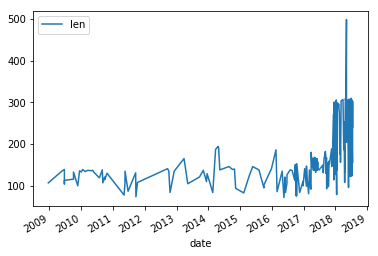

In [51]:
flash.plot(x='date', y='len')

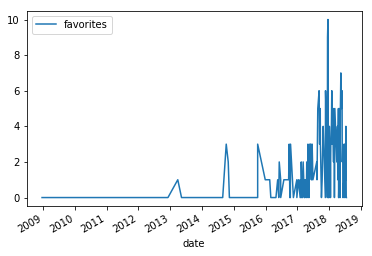

In [52]:
flash.plot(x='date', y='favorites')

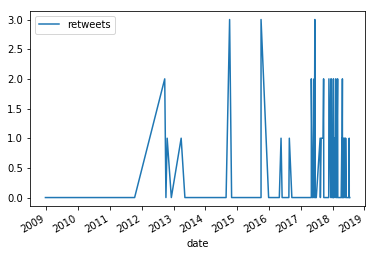

In [53]:
flash.plot(x='date', y='retweets')

In [54]:
# We create a column with the result of the analysis:
flash['SA'] = np.array([ analize_sentiment(text) for text in flash['text'] ])

# We display the updated dataframe with the new column:
display(flash.head(10))

,username,user_handle,date,retweets,favorites,text,geological_location,mentions,hashtags,tweet_id,permalink,len,SA
0,Flash Technology,flashtechnology,2017-12-18 10:45:00,2,10,I'm dreaming of white Christmas Just like the ...,NaN,NaN,NaN,9.430000e+17,https://twitter.com/flashtechnology/status/942...,301,1
1,Flash Technology,flashtechnology,2017-12-13 10:25:00,2,9,We don’t have a chimney and these aren’t exact...,NaN,NaN,NaN,9.410000e+17,https://twitter.com/flashtechnology/status/940...,115,1
2,Flash Technology,flashtechnology,2018-05-15 10:17:00,0,7,"Last Tuesday, Flash Field Services held our # ...",NaN,NaN,# #,9.960000e+17,https://twitter.com/flashtechnology/status/996...,306,1
3,Flash Technology,flashtechnology,2017-11-20 10:12:00,2,6,Downtown Nashville at night from @ MusicCityAe...,NaN,@ @,NaN,9.330000e+17,https://twitter.com/flashtechnology/status/932...,147,1
4,Flash Technology,flashtechnology,2017-09-07 10:27:00,1,6,With the recent devastation from # Harvey and ...,NaN,NaN,# # # #,9.060000e+17,https://twitter.com/flashtechnology/status/905...,183,0
5,Flash Technology,flashtechnology,2018-05-29 13:01:00,0,6,"In the 3rd annual Flash # fooddrive, our staff...",NaN,NaN,# # #,1.000000e+18,https://twitter.com/flashtechnology/status/100...,163,0
6,Flash Technology,flashtechnology,2018-01-31 13:57:00,0,6,"A sleepy coastal town in northeastern Brazil, ...",NaN,NaN,NaN,9.590000e+17,https://twitter.com/flashtechnology/status/958...,288,-1
7,Flash Technology,flashtechnology,2017-09-20 10:23:00,2,5,A # towerclimber scales Willis Tower's antenna...,NaN,NaN,# #,9.110000e+17,https://twitter.com/flashtechnology/status/910...,168,0
8,Flash Technology,flashtechnology,2018-04-17 12:01:00,1,5,Stop by to see Gary and Mark in booth 17! # st...,NaN,NaN,#,9.860000e+17,https://twitter.com/flashtechnology/status/986...,109,0
9,Flash Technology,flashtechnology,2018-02-21 19:16:00,1,5,Connor enjoyed discussing obstructed beacons a...,NaN,@,# # # # #,9.660000e+17,https://twitter.com/flashtechnology/status/966...,247,1


In [55]:
# We construct lists with classified tweets:

pos_tweets = [ text for index, text in enumerate(flash['text']) if flash['SA'][index] > 0]
neu_tweets = [ text for index, text in enumerate(flash['text']) if flash['SA'][index] == 0]
neg_tweets = [ text for index, text in enumerate(flash['text']) if flash['SA'][index] < 0]

In [56]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(flash['text'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(flash['text'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(flash['text'])))

Percentage of positive tweets: 44.87179487179487%
Percentage of neutral tweets: 49.35897435897436%
Percentage of negative tweets: 5.769230769230769%


In [57]:
word_string=" ".join(flash['text'].str.lower())
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['flash','technologies','http','com','www','bit','ly','https','twitter']
stopwords.extend(newStopWords)

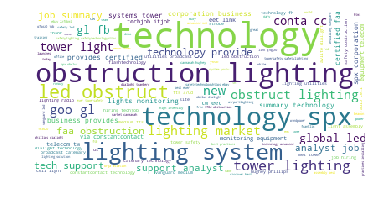

In [58]:
no_url_word_string = re.sub(r"[\w.-]+twitter[\w.-]+", '', word_string)
wordcloud = WordCloud(stopwords=stopwords, background_color='white', max_words=300).generate(no_url_word_string)
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

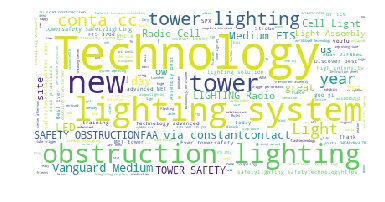

In [59]:
word_string=" ".join(pos_tweets)
no_url_word_string = re.sub(r"[\w.-]+twitter[\w.-]+", '', word_string)
wordcloud = WordCloud(stopwords=stopwords, background_color='white', max_words=300).generate(no_url_word_string)
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

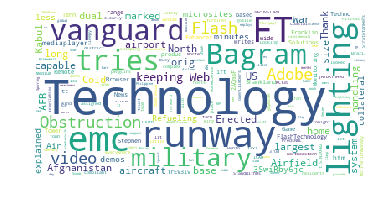

In [60]:
word_string=" ".join(neg_tweets)
no_url_word_string = re.sub(r"[\w.-]+twitter[\w.-]+", '', word_string)
wordcloud = WordCloud(stopwords=stopwords, background_color='white', max_words=300).generate(no_url_word_string)
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [63]:
flash.to_csv('Flash_Processed.csv')